<a href="https://colab.research.google.com/github/rbauza7/Ejercicio-4-Examen-final/blob/main/Ej_3_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La selección de un modelo adecuado para predecir la potabilidad del agua requiere un punto de vista estructurado que considere tanto las características del conjunto de datos como las fortalezas y limitaciones de los modelos disponibles. El primer paso es el preprocesamiento, donde se identifican y corrigen problemas como valores faltantes, outliers y escalas inconsistentes. Posteriormente, se evalúan diferentes algoritmos de clasificación, como árboles de decisión, Naive Bayes, Random Forest y SVM, cada uno con ventajas específicas dependiendo de la naturaleza de los datos. Por ejemplo, Random Forest es particularmente robusto frente a outliers y permite calcular la importancia de las variables, mientras que SVM es efectivo para datos con límites de decisión no lineales pero requiere escalado previo. La elección  debe justificarse mediante métricas de evaluación como la matriz de confusión y el F1-score, asegurando que el modelo seleccionado ofrezca un buen balance entre precisión, sensibilidad y especificidad. Este enfoque garantiza que la decisión esté basada tanto en el rendimiento técnico como en la capacidad del modelo para abordar las peculiaridades del problema planteado.Primero evaluemos los datos.

**Instalar R**

In [1]:
# Instalar R
!apt-get install -y r-base
# Instalar IRKernel
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

In [1]:
# Instalar librerías necesarias
install.packages("readr")  # Para leer datos CSV
install.packages("tidyverse")  # Paquete para manipulación de datos

# Cargar librerías
library(readr)
library(tidyverse)

# Leer archivo desde GitHub
url <- "https://github.com/rbauza7/Ejercicio-4-Examen-final/raw/refs/heads/main/water_potability.csv"
water_data <- read_csv(url)

# Visualizar las primeras filas
head(water_data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 3276 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


**Características básicas**

In [2]:
# Resumen general de los datos
summary(water_data)

# Verificar valores faltantes en el conjunto de datos
colSums(is.na(water_data))

# Obtener las dimensiones del conjunto de datos (filas y columnas)
dim(water_data)


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:307.7   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 55.845  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:360.0   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 77.337  
 Max.   :481.0   Max.   :753.3   Max. 

ph        Hardness          Solids     Chloramines         Sulfate 
            491               0               0               0             781 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0             162               0               0

[1] 3276   10

El análisis inicial del conjunto de datos indica presencia de valores faltantes en las variables pH, Sulfate y Trihalomethanes, con 491, 781 y 162 valores faltantes respectivamente. Hay que hacer un manejo adecuado de estos datos antes de proceder con el modelado, ya que representan una proporción significativa del total de observaciones en algunos casos. Las demás variables, como Hardness, Solids, Chloramines, Conductivity, Organic_carbon y Turbidity, no presentan valores faltantes, . La variable objetivo, Potability, está completamente definida y no contiene valores faltantes. A partir de estos hallazgos, se deben tomar decisiones , ya sea imputándolos utilizando métodos estadísticos como la media o la mediana, o eliminando las filas afectadas si su proporción no compromete la integridad del conjunto de datos.

In [11]:
# Resumen estadístico general
summary(water_data)

# Verificar la presencia de valores faltantes en todas las columnas
colSums(is.na(water_data))

# Verificar los tipos de datos de cada columna
str(water_data)


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:317.1   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 56.648  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.6   Mean   :426.2   Mean   :14.28   Mean   : 66.407  
 3rd Qu.:350.4   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 76.667  
 Max.   :481.0   Max.   :753.3   Max. 

ph        Hardness          Solids     Chloramines         Sulfate 
            491               0               0               0               0 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0               0               0               0

spc_tbl_ [3,276 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ph             : num [1:3276] NA 3.72 8.1 8.32 9.09 ...
 $ Hardness       : num [1:3276] 205 129 224 214 181 ...
 $ Solids         : num [1:3276] 20791 18630 19910 22018 17979 ...
 $ Chloramines    : num [1:3276] 7.3 6.64 9.28 8.06 6.55 ...
 $ Sulfate        : num [1:3276] 369 333 333 357 310 ...
 $ Conductivity   : num [1:3276] 564 593 419 363 398 ...
 $ Organic_carbon : num [1:3276] 10.4 15.2 16.9 18.4 11.6 ...
 $ Trihalomethanes: num [1:3276] 87 56.3 66.4 100.3 32 ...
 $ Turbidity      : num [1:3276] 2.96 4.5 3.06 4.63 4.08 ...
 $ Potability     : num [1:3276] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   ph = col_double(),
  ..   Hardness = col_double(),
  ..   Solids = col_double(),
  ..   Chloramines = col_double(),
  ..   Sulfate = col_double(),
  ..   Conductivity = col_double(),
  ..   Organic_carbon = col_double(),
  ..   Trihalomethanes = col_double(),
  ..   Turbidity = col_double(),
  ..   Pot

In [12]:
# Imputar valores faltantes en pH con la mediana
water_data$pH[is.na(water_data$pH)] <- median(water_data$pH, na.rm = TRUE)

# Verificar que ya no hay valores faltantes
colSums(is.na(water_data))

# Generar un histograma para visualizar la distribución de pH
hist(water_data$pH, main = "Distribución del pH", xlab = "pH", col = "lightblue", border = "black")


Warning message:
“Unknown or uninitialised column: `pH`.”
Warning message:
“Unknown or uninitialised column: `pH`.”
Warning message:
“Unknown or uninitialised column: `pH`.”


ph        Hardness          Solids     Chloramines         Sulfate 
            491               0               0               0               0 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0               0               0               0

Warning message:
“Unknown or uninitialised column: `pH`.”


ERROR: Error in hist.default(water_data$pH, main = "Distribución del pH", xlab = "pH", : 'x' must be numeric


Normalización de variables

In [14]:
# Normalizar todas las variables numéricas excepto la variable objetivo
normalize <- function(x) {
  return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Aplicar normalización
water_data_norm <- water_data
water_data_norm[ , -which(names(water_data) == "Potability")] <- lapply(water_data_norm[ , -which(names(water_data) == "Potability")], normalize)

# Verificar el resultado
summary(water_data_norm)


       ph            Hardness          Solids        Chloramines    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.4352   1st Qu.:0.4694   1st Qu.:0.2520   1st Qu.:0.4521  
 Median :0.5026   Median :0.5424   Median :0.3383   Median :0.5306  
 Mean   :0.5058   Mean   :0.5402   Mean   :0.3562   Mean   :0.5300  
 3rd Qu.:0.5759   3rd Qu.:0.6139   3rd Qu.:0.4435   3rd Qu.:0.6077  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 NA's   :491                                                        
    Sulfate        Conductivity    Organic_carbon   Trihalomethanes 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5343   1st Qu.:0.3222   1st Qu.:0.3780   1st Qu.:0.4536  
 Median :0.5797   Median :0.4204   Median :0.4605   Median :0.5345  
 Mean   :0.5812   Mean   :0.4279   Mean   :0.4630   Mean   :0.5328  
 3rd Qu.:0.6289   3rd Qu.:0.5251   3rd Qu.:0.5501   3rd Qu.:0.6160  
 Max.   :1.0000   Max.   :1.0000  

Evaluación de datos atípicos usando boxplots

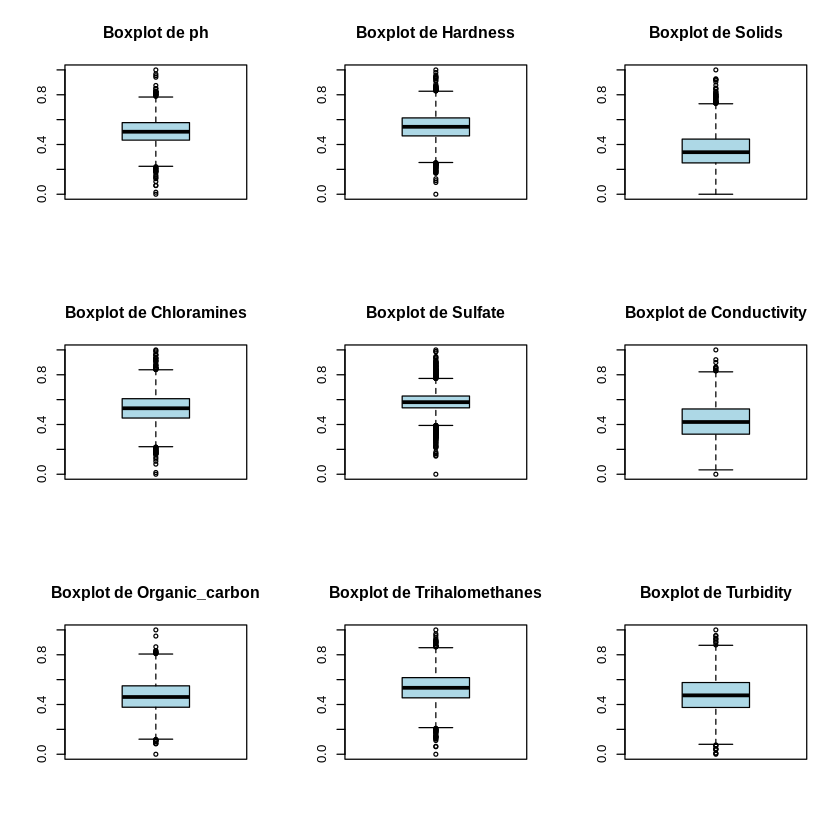

In [15]:
# Crear boxplots para todas las variables numéricas excepto la variable objetivo
par(mfrow = c(3, 3))  # Ajustar el layout para múltiples gráficos
numeric_columns <- setdiff(names(water_data_norm), "Potability")

for (col in numeric_columns) {
  boxplot(water_data_norm[[col]], main = paste("Boxplot de", col), col = "lightblue", border = "black")
}


Eliminar datos atípicos

In [16]:
# Función para eliminar outliers basada en el rango intercuartil
remove_outliers <- function(df, col_name) {
  Q1 <- quantile(df[[col_name]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df[[col_name]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  df <- df[df[[col_name]] >= lower_bound & df[[col_name]] <= upper_bound, ]
  return(df)
}

# Aplicar la función a todas las columnas numéricas
for (col in numeric_columns) {
  water_data_norm <- remove_outliers(water_data_norm, col)
}

# Verificar el nuevo tamaño del conjunto de datos
dim(water_data_norm)


[1] 2809   10

Ajuste del primer modelo

El modelo Random Forest es una elección  para este análisis debido a su robustez frente a valores atípicos y datos tratados, su capacidad para manejar variables interrelacionadas y como modelo no paramétrico, que no requiere suposiciones sobre la distribución de los datos. Además, permite identificar la importancia de las variables en la predicción, lo que aporta información valiosa sobre el problema. Estas características hacen de Random Forest un  punto de partida para evaluar la potabilidad del agua.

Dividir datos para ver configuración

In [18]:
# Dividir los datos en entrenamiento y prueba
set.seed(123)  # Para reproducibilidad
train_index <- sample(1:nrow(water_data_norm), 0.7 * nrow(water_data_norm))

train_data <- water_data_norm[train_index, ]
test_data <- water_data_norm[-train_index, ]

# Confirmar las dimensiones de los conjuntos
cat("Conjunto de entrenamiento:", dim(train_data)[1], "filas\n")
cat("Conjunto de prueba:", dim(test_data)[1], "filas\n")


Conjunto de entrenamiento: 1966 filas
Conjunto de prueba: 843 filas


In [21]:
# Verificar las primeras filas de train_data
head(train_data)

# Verificar el resumen de las columnas
str(train_data)


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5956741,0.4648838,0.2020960,0.5185373,0.5797039,0.4736374,0.5873119,0.8203128,0.5074109,0
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.4685448,0.3797107,0.3661872,0.5799693,0.7343645,0.3713096,0.3029679,0.4425425,0.4186922,0
0.4483068,0.4988177,0.4651826,0.4827738,0.5859086,0.5052749,0.3447695,0.5345077,0.5469388,0
0.3639833,0.8196700,0.4266615,0.7724308,0.7135785,0.5812515,0.6158015,0.4923430,0.5487225,0
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


tibble [1,966 × 10] (S3: tbl_df/tbl/data.frame)
 $ ph             : num [1:1966] 0.596 NA 0.469 0.448 0.364 ...
 $ Hardness       : num [1:1966] 0.465 NA 0.38 0.499 0.82 ...
 $ Solids         : num [1:1966] 0.202 NA 0.366 0.465 0.427 ...
 $ Chloramines    : num [1:1966] 0.519 NA 0.58 0.483 0.772 ...
 $ Sulfate        : num [1:1966] 0.58 NA 0.734 0.586 0.714 ...
 $ Conductivity   : num [1:1966] 0.474 NA 0.371 0.505 0.581 ...
 $ Organic_carbon : num [1:1966] 0.587 NA 0.303 0.345 0.616 ...
 $ Trihalomethanes: num [1:1966] 0.82 NA 0.443 0.535 0.492 ...
 $ Turbidity      : num [1:1966] 0.507 NA 0.419 0.547 0.549 ...
 $ Potability     : num [1:1966] 0 NA 0 0 0 NA 0 0 NA NA ...


Hay datos faltantes

In [22]:
# Imputar valores faltantes en train_data con la mediana
for (col in names(train_data)) {
  train_data[[col]][is.na(train_data[[col]])] <- median(train_data[[col]], na.rm = TRUE)
}

# Repetir para test_data
for (col in names(test_data)) {
  test_data[[col]][is.na(test_data[[col]])] <- median(test_data[[col]], na.rm = TRUE)
}

# Verificar que ya no haya valores faltantes
colSums(is.na(train_data))
colSums(is.na(test_data))


ph        Hardness          Solids     Chloramines         Sulfate 
              0               0               0               0               0 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0               0               0               0

ph        Hardness          Solids     Chloramines         Sulfate 
              0               0               0               0               0 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0               0               0               0

Entrenar el modelo Random Forest

In [23]:
# Entrenar el modelo Random Forest
set.seed(123)
rf_model <- randomForest(Potability ~ ., data = train_data, ntree = 100, importance = TRUE)

# Verificar el modelo
print(rf_model)


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Potability ~ ., data = train_data, ntree = 100,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1884459
                    % Var explained: 12.87


Elaboración d ematriz de confusión y precisión

In [24]:
# Convertir Potability a factor en los conjuntos de datos
train_data$Potability <- as.factor(train_data$Potability)
test_data$Potability <- as.factor(test_data$Potability)

# Entrenar el modelo nuevamente
set.seed(123)
rf_model <- randomForest(Potability ~ ., data = train_data, ntree = 100, importance = TRUE)

# Verificar el modelo
print(rf_model)



Call:
 randomForest(formula = Potability ~ ., data = train_data, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 30.82%
Confusion matrix:
     0   1 class.error
0 1168 176   0.1309524
1  430 192   0.6913183


Predicción

In [25]:
# Predecir con el modelo en los datos de prueba
predictions <- predict(rf_model, test_data)

# Crear matriz de confusión
conf_matrix <- table(test_data$Potability, predictions)
print(conf_matrix)

# Calcular la precisión del modelo
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Precisión del modelo:", round(accuracy, 2), "\n")


   predictions
      0   1
  0 548  46
  1 177  72
Precisión del modelo: 0.74 


**Código para KNN**

In [26]:
# Instalar y cargar librería necesaria
if (!require(class)) install.packages("class")
library(class)

# Preparar las variables predictoras y objetivo
train_predictors <- train_data[, -which(names(train_data) == "Potability")]
train_target <- train_data$Potability

test_predictors <- test_data[, -which(names(test_data) == "Potability")]
test_target <- test_data$Potability

# Entrenar y predecir con KNN (k = 5 por defecto, ajustable)
set.seed(123)
knn_predictions <- knn(train = train_predictors, test = test_predictors, cl = train_target, k = 5)

# Evaluar el modelo
knn_conf_matrix <- table(test_target, knn_predictions)
print(knn_conf_matrix)

# Calcular precisión
knn_accuracy <- sum(diag(knn_conf_matrix)) / sum(knn_conf_matrix)
cat("Precisión del modelo KNN:", round(knn_accuracy, 2), "\n")


Loading required package: class



           knn_predictions
test_target   0   1
          0 490 104
          1 170  79
Precisión del modelo KNN: 0.67 


In [27]:
# Instalar y cargar librería necesaria
if (!require(rpart)) install.packages("rpart")
library(rpart)

# Entrenar el modelo de Árbol de Decisión
set.seed(123)
tree_model <- rpart(Potability ~ ., data = train_data, method = "class")

# Visualizar el árbol de decisión
print(tree_model)

# Evaluar el modelo
tree_predictions <- predict(tree_model, test_data, type = "class")
tree_conf_matrix <- table(test_data$Potability, tree_predictions)

# Mostrar matriz de confusión
print(tree_conf_matrix)

# Calcular precisión
tree_accuracy <- sum(diag(tree_conf_matrix)) / sum(tree_conf_matrix)
cat("Precisión del modelo Árbol de Decisión:", round(tree_accuracy, 2), "\n")


Loading required package: rpart



n= 1966 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1966 622 0 (0.68362157 0.31637843)  
    2) Chloramines< 0.5541376 1307 344 0 (0.73680184 0.26319816)  
      4) Chloramines>=0.52663 507  49 0 (0.90335306 0.09664694) *
      5) Chloramines< 0.52663 800 295 0 (0.63125000 0.36875000)  
       10) ph>=0.6083007 144  26 0 (0.81944444 0.18055556) *
       11) ph< 0.6083007 656 269 0 (0.58993902 0.41006098)  
         22) Hardness< 0.5957394 476 176 0 (0.63025210 0.36974790)  
           44) Solids< 0.52794 417 140 0 (0.66426859 0.33573141) *
           45) Solids>=0.52794 59  23 1 (0.38983051 0.61016949) *
         23) Hardness>=0.5957394 180  87 1 (0.48333333 0.51666667)  
           46) Sulfate< 0.6263678 139  60 0 (0.56834532 0.43165468)  
             92) Hardness>=0.6185547 108  39 0 (0.63888889 0.36111111) *
             93) Hardness< 0.6185547 31  10 1 (0.32258065 0.67741935) *
           47) Sulfate>=0.6263678 41   8 1 (0.19512195 0.80487805) *

Modleo Naive Bayes

In [28]:
# Instalar y cargar la librería necesaria
if (!require(e1071)) install.packages("e1071")
library(e1071)

# Entrenar el modelo Naive Bayes
set.seed(123)
nb_model <- naiveBayes(Potability ~ ., data = train_data)

# Evaluar el modelo
nb_predictions <- predict(nb_model, test_data)
nb_conf_matrix <- table(test_data$Potability, nb_predictions)

# Mostrar matriz de confusión
print(nb_conf_matrix)

# Calcular precisión
nb_accuracy <- sum(diag(nb_conf_matrix)) / sum(nb_conf_matrix)
cat("Precisión del modelo Naive Bayes:", round(nb_accuracy, 2), "\n")


Loading required package: e1071

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




   nb_predictions
      0   1
  0 489 105
  1 188  61
Precisión del modelo Naive Bayes: 0.65 


In [29]:
# Crear un dataframe con los resultados
resultados <- data.frame(
  Metodo = c("KNN", "Árbol de decisión", "Naive Bayes", "Random Forest"),
  Precision = c(67, 69, 65, 74)
)

# Mostrar la tabla en formato ordenado
print(resultados)

# Si deseas un formato más visual, puedes usar knitr::kable (opcional)
if (!require(knitr)) install.packages("knitr")
library(knitr)

kable(resultados, col.names = c("Método de Clasificación", "% de Buena Clasificación"),
      caption = "Resultados de los Modelos Evaluados")


             Metodo Precision
1               KNN        67
2 Árbol de decisión        69
3       Naive Bayes        65
4     Random Forest        74


Loading required package: knitr





Table: Resultados de los Modelos Evaluados

|Método de Clasificación | % de Buena Clasificación|
|:-----------------------|------------------------:|
|KNN                     |                       67|
|Árbol de decisión       |                       69|
|Naive Bayes             |                       65|
|Random Forest           |                       74|

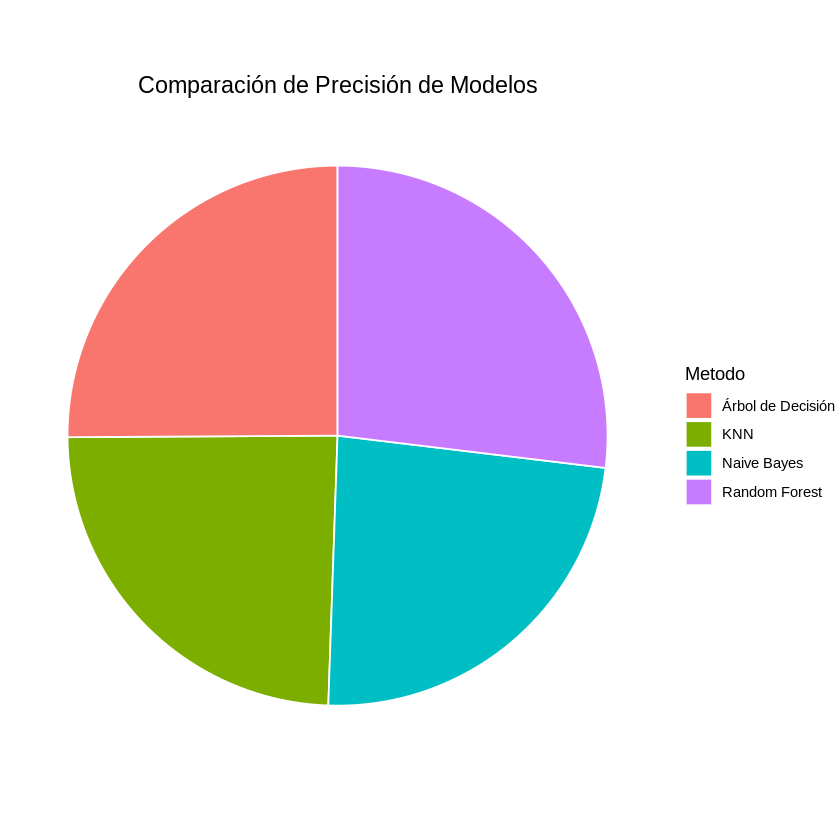

In [31]:
# Instalar y cargar ggplot2
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Crear un dataframe con los resultados
resultados <- data.frame(
  Metodo = c("KNN", "Árbol de Decisión", "Naive Bayes", "Random Forest"),
  Precision = c(67, 69, 65, 74)
)

# Crear la gráfica de pastel
ggplot(resultados, aes(x = "", y = Precision, fill = Metodo)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  theme_void() +
  labs(title = "Comparación de Precisión de Modelos") +
  theme(plot.title = element_text(hjust = 0.5, size = 14))
